In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

In [2]:
%matplotlib widget

In [3]:
fd = np.loadtxt('/Users/olgaridzel/Downloads/sample_record_rbd_2.txt')

In [5]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf



ModuleNotFoundError: No module named 'statsmodels'

In [6]:
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for statsmodels: filename=statsmodels-0.13.4-cp38-cp38-macosx_10_14_x86_64.whl size=12260638 sha256=545c155244578afec5de71d01008c19fd678c0bdbdd8abd0b819dfe878163e14
  Stored in directory: /Users/olgaridzel/Library/Caches/pip/wheels/11/b5/d6/88325669a3118ceb4b1e1ab01003b8854903f89926bb4f373b
Successfully built statsmodels

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


## PMMA

In [78]:
fd_ale = np.loadtxt("materials/pmma/sey/cern.sey")
fd_low_cern = np.loadtxt("materials/pmma/sey/pmma_low_sey_cern.csv",delimiter=",")
fd_cern = np.loadtxt("materials/pmma/sey/pmma_sey_cern.csv",delimiter=",")

fd_spa = np.loadtxt("materials/pmma/spa/out-ph/sey.plot")
fd_mll = np.loadtxt("materials/pmma/mll/out-ph/sey.plot")

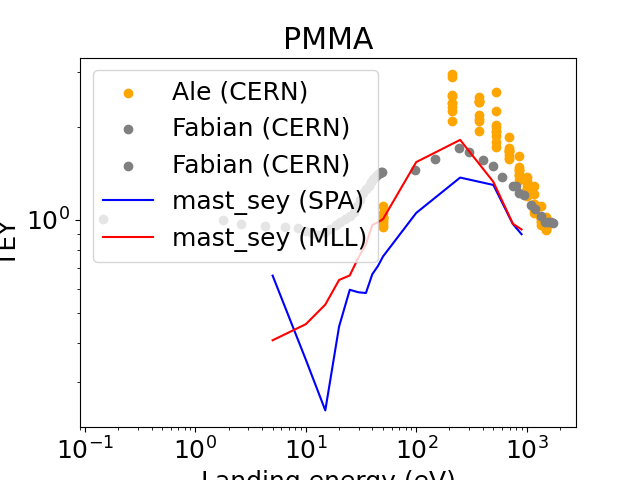

In [79]:
plt.figure()

plt.scatter(fd_ale[:,0], fd_ale[:,1],label="Ale (CERN)",color="orange")
plt.scatter(fd_low_cern[:,0], fd_low_cern[:,1],label="Fabian (CERN)",color="gray")
plt.scatter(fd_cern[:,0], fd_cern[:,1],label="Fabian (CERN)",color="gray")

plt.plot(fd_spa[:,0], fd_spa[:,1],label="mast_sey (SPA)",color='blue')
plt.plot(fd_mll[:,0], fd_mll[:,1],label="mast_sey (MLL)",color='red')

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PMMA")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [69]:
fd_mfp_spa = np.loadtxt("materials/pmma/spa/mfp.plot")
fd_mfp_mll = np.loadtxt("materials/pmma/mll/mfp.plot")
fd_imfp_tpp = np.loadtxt("../optical-data-fit/imfp/pmma/pmma_New_TPP-2M.imfp")

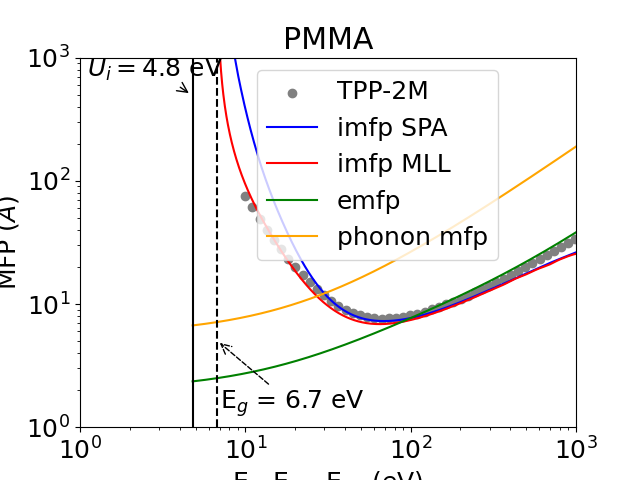

In [73]:
plt.figure()

plt.scatter(fd_imfp_tpp[:,0], fd_imfp_tpp[:,1],label="TPP-2M",color="gray")

plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,1],label="imfp SPA",color="blue")
plt.plot(fd_mfp_mll[:,0], fd_mfp_mll[:,1],label="imfp MLL",color="red")

plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,2],label="emfp",color="green")
plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,3],label="phonon mfp",color="orange")
# plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,4],'--',label="phonon mfp",color="orange")

plt.plot([4.8, 4.8], [1, 1000], color="black")
plt.annotate(r"$U_i = 4.8$ eV", xy=(4.7, 500), xytext=(1.1, 700), arrowprops=dict(arrowstyle="->"))

plt.plot([6.7, 6.7], [1, 1000], "--", color="black")
plt.annotate(r"E$_g$ = 6.7 eV", xy=(6.8, 5), xytext=(7, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))


plt.xlabel(r"E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel(r"MFP ($\AA$)")
plt.title("PMMA")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1))
plt.show()

In [50]:
fd_el = np.loadtxt("materials/pmma/spa/mc_sc_el.plot")
fd_in = np.loadtxt("materials/pmma/spa/mc_sc_in.plot")
fd_ph = np.loadtxt("materials/pmma/spa/mc_sc_ph.plot")
fd_pol = np.loadtxt("materials/pmma/spa/mc_sc_pol.plot")

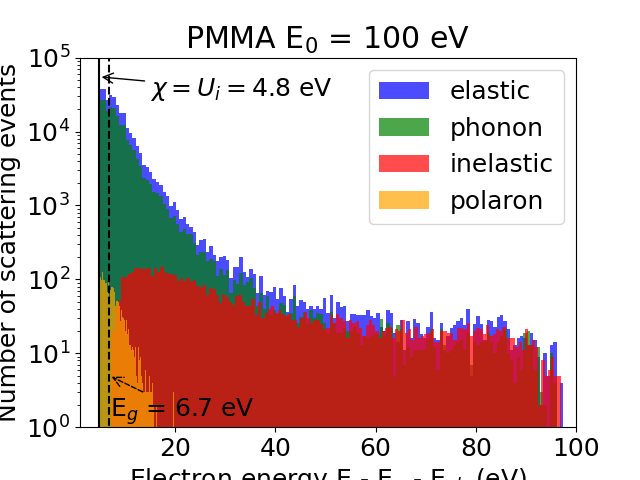

In [66]:
plt.figure()
plt.hist(fd_el,150,color='b',label="elastic",alpha=0.7)
plt.hist(fd_ph,150,color='g',label="phonon",alpha=0.7)
plt.hist(fd_in,150,color='r',label="inelastic",alpha=0.7)
plt.hist(fd_pol,150,color='orange',label="polaron",alpha=0.7)

plt.plot([4.8, 4.8], [-1, 100000], color="black")
plt.annotate(r"$\chi = U_i = 4.8$ eV", xy=(4.75, 55000), xytext=(15.0, 30000), arrowprops=dict(arrowstyle="->"))

plt.plot([6.7, 6.7], [-1, 100000], "--", color="black")
plt.annotate(r"E$_g$ = 6.7 eV", xy=(6.8, 5), xytext=(7, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))

plt.ylim(1,1e5)
plt.xlim(1,100)
plt.yscale('log')
plt.xlabel(r"Electron energy E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel("Number of scattering events")
plt.title(r"PMMA E$_0$ = 100 eV")
plt.legend()
plt.show()

In [37]:
np.unique(fd_in)

array([0.])

In [11]:
3.85*27

103.95

In [20]:
0.00145/27

5.37037037037037e-05

In [82]:
fd = np.loadtxt("materials/mgo/MgO-MC/phdos.in")

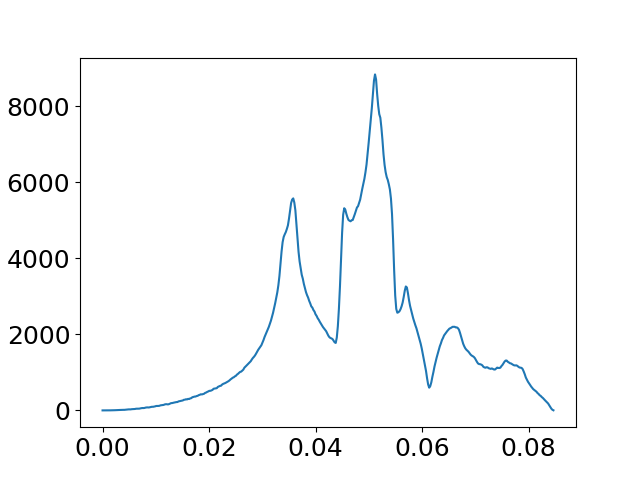

In [83]:
plt.figure()
plt.plot(fd[:,0],fd[:,1])
plt.show()